In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("p4.ipynb")

In [3]:
import test

In [4]:
import math

## Project 4: Pokémon Battle Simulation

### Learning Objectives:

In this project, you will demonstrate how to

* Use conditional statements to implement decisions,
* Write functions using parameters, return values, and conditional logic,
* Use good coding practices as outlined in lab-p4.

**Please go through [lab-p4](https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-f22-projects/-/tree/main/lab-p4) before working on this project.** The lab introduces some useful techniques related to this project.

## Testing your code:

Along with this notebook, you must have downloaded the file `test.py`. If you are curious about how we test your code, you can explore this file, and specifically the value of the variable `expected_json`, to understand the expected answers to the questions.

## Project Description:

For this project, you'll be using the data from `pokemon_stats.csv` and `type_effectiveness_stats.csv` to simulate Pokémon battles and to check the compatibility for friendships between different Pokémon. This data was gathered by the Python program `gen_csv.ipynb` from the website https://www.pokemondb.net/.

* To start, download `project.py`, `test.py`, `type_effectiveness_stats.csv`, and `pokemon_stats.csv`.
* You'll do all your work on this notebook, and turn it into Gradescope just as you did for the previous projects.

We won't explain how to use the project module here (the code in the `project.py` file), or the dataset that you will be working with. The lab this week is designed to teach you how it works. So, before starting p4, take a look at lab-p4.

In this project, you will have to write several functions and keep adding more details to them according to the instructions. When you are adding more things to your functions, we want you to follow the **Good Coding Style for Functions** described in [lab-p4](https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-f22-projects/-/tree/main/lab-p4). Therefore, you should only keep the latest version of your functions in your notebook file. For example, in this project, you will keep improving the functions you write, and add more functionality to them as the project progresses. However, you should not define a new function each time you do so. Instead, you should keep only one copy of each of the six functions that you will need to define in this project (`damage`, `type_bonus`, `effective_damage`, `num_hits`, `battle`, and `friendship_score`). You can do this by replacing your old function definition with the new one after you have confirmed that the new one works.

## Questions and Functions:

Let us start by importing all the modules we will need for this project.

In [5]:
# it is considered a good coding practice to place all import statements at the top of the notebook

# please place all your import statements in this cell if you need to import 
# any more modules for this project
import project

In [6]:
dir(project)
help(project)

Help on module project:

NAME
    project

FUNCTIONS
    __init__()
        This function loads the data from `pokemon_stats.csv` and `type_effectiveness_stats.csv`. This function runs automatically, when the module is imported
    
    get_attack(pkmn)
        get_attack(pkmn) returns the Attack of the Pokémon with the name `pkmn`
    
    get_defense(pkmn)
        get_defense(pkmn) returns the Defense of the Pokémon with the name `pkmn`
    
    get_hp(pkmn)
        get_hp(pkmn) returns the HP of the Pokémon with the name `pkmn`
    
    get_region(pkmn)
        get_region(pkmn) returns the region of the Pokémon with the name `pkmn`
    
    get_sp_atk(pkmn)
        get_sp_atk(pkmn) returns the Special Attack of the Pokémon with the name `pkmn`
    
    get_sp_def(pkmn)
        get_sp_def(pkmn) returns the Special Defense of the Pokémon with the name `pkmn`
    
    get_speed(pkmn)
        get_speed(pkmn) returns the Speed of the Pokémon with the name `pkmn`
    
    get_type1(pkmn)


In the first stage of this project, we will be simulating Pokémon battles. Before we proceed any further, let us take a look at the Pokémon we will be dealing with in this project (let us know what your favorite Pokémon is in a comment):

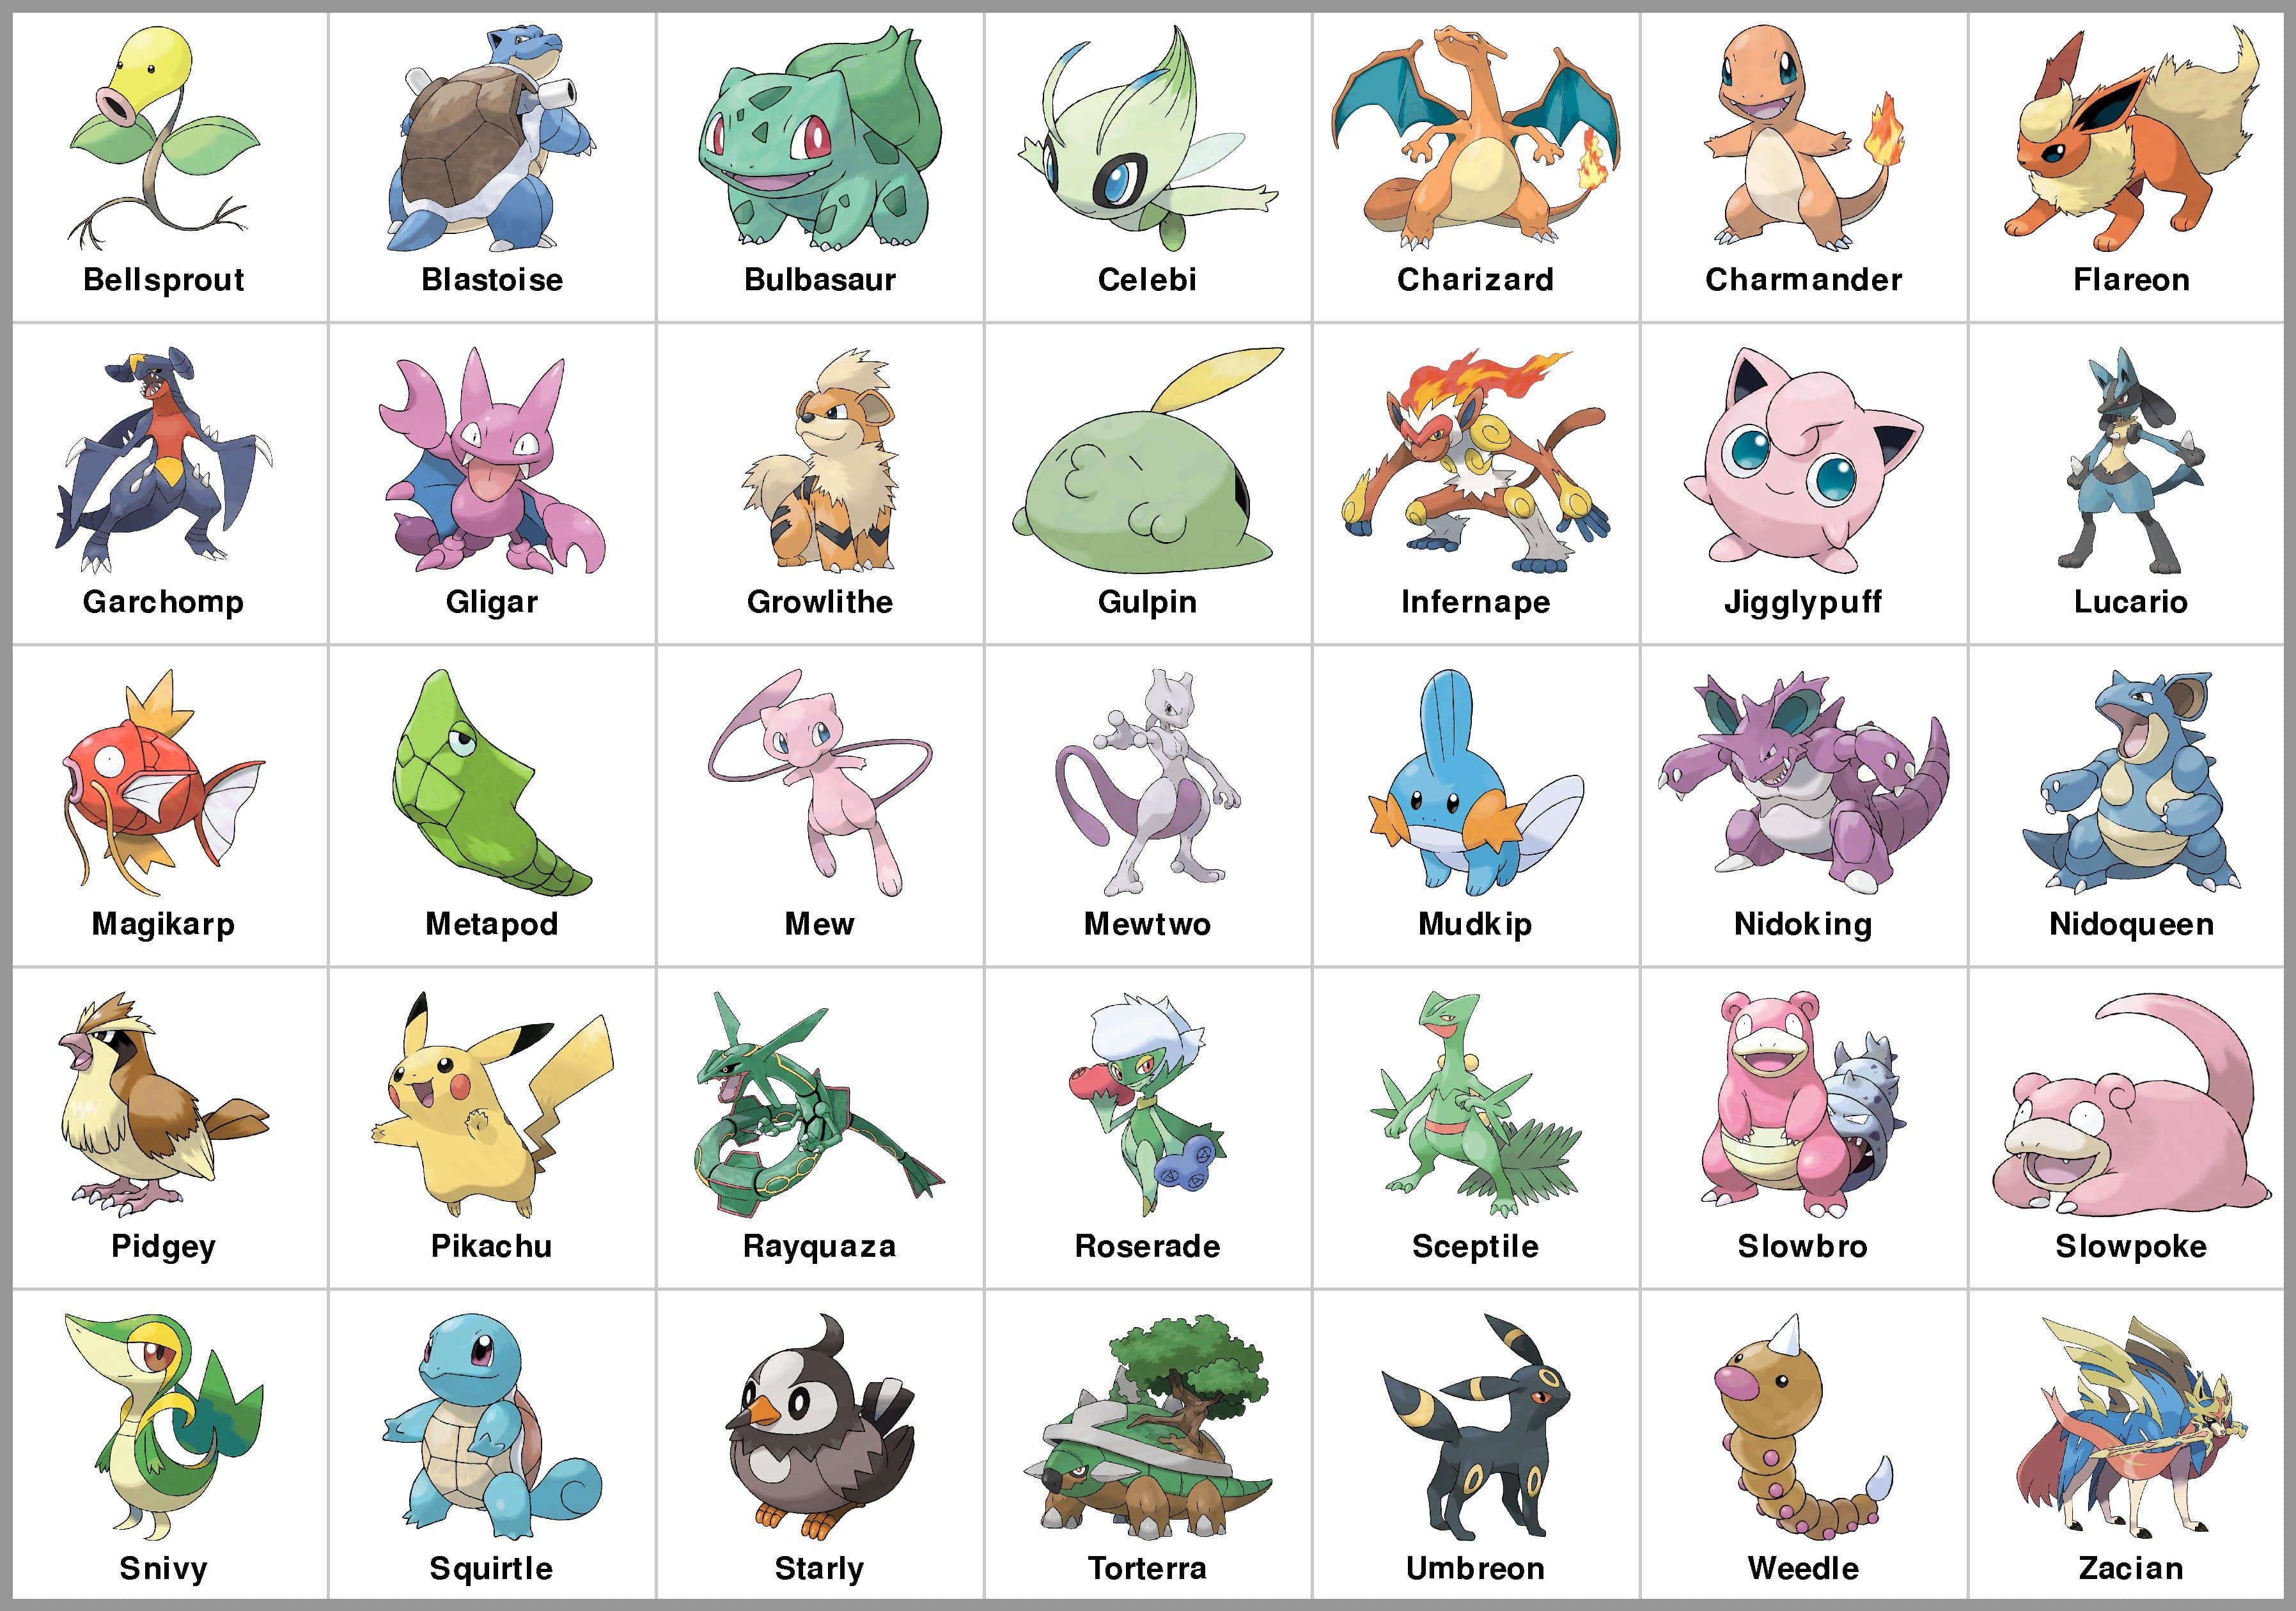

## Rules for Pokémon battles:

Now, here are the *rules* governing Pokémon battles:

1. A Pokémon battle takes place between two Pokémon
2. The two Pokémon take turns attacking each other.
3. The Pokémon with the higher **Speed** stat attacks first.
4. On each turn, the attacking Pokémon can choose between two modes of attack - **Physical** or **Special**.
5. In addition to the attack mode, each Pokémon can choose the **type** of its attack.
6. Based on the move chosen by the attacking Pokémon, the defending Pokémon receives damage to its **HP**.
7. If a Pokémon's **HP** drops to (or below) 0, it faints and therefore loses the battle.
8. However, if one Pokémon is much stronger than the other, then the weaker Pokémon will **run away** instead of fighting.

Throughout this project, we will break this down into smaller parts and slowly build up to the `battle()` function.

The first thing we need to do is calculate the damage caused by one Pokémon's attack on another Pokémon. To accomplish this, we need to create the function `damage(attacker, defender)`.

### Function 1: `damage(attack, defender)`

The `attacker` can choose between two attack modes - **Physical** or **Special**. The damage caused by the attacker's **Physical** move is `10 * Attack stat of Attacker / Defense stat of Defender`, and the damage caused by the attacker's **Special** move is `10 * Sp. Atk. stat of Attacker / Sp. Def. stat of Defender`.

**If the attacker wants to win, it should always choose the move which will do more damage.** So, that is what we want our function `damage` to do. We want this function to find out which mode of attack the attacker would choose, and return the damage that the attacker would do to the defender.

Use the following code snippet and fill in the details to complete the `damage` function.

In [7]:
def damage(attacker, defender):
    # TODO: replace the ... in this function with your code
    physical_damage = 10 * project.get_attack(attacker) / project.get_defense(defender)
    special_damage = 10 * project.get_sp_atk(attacker) / project.get_sp_def(defender)
    if physical_damage > special_damage:
        return physical_damage
    else:
        return special_damage

Now, let's find out if this function works. Use `damage()` to answer the next two questions.

**Question 1:** How much damage does `Zacian` do to `Mewtwo`?

In [8]:
damage_zacian_mewtwo = damage("Zacian", "Mewtwo")
damage_zacian_mewtwo

18.88888888888889

In [9]:
grader.check("q1")

q1 results: All test cases passed!

**Question 2:** How much damage does `Slowbro` do to `Slowpoke`?

In [10]:
damage_slowbro_slowpoke = damage("Slowbro", "Slowpoke")
damage_slowbro_slowpoke

25.0

In [11]:
grader.check("q2")

q2 results: All test cases passed!

In addition to choosing the attack **mode** (i.e. **Physical** or **Special**), the attacker can also (sometimes) choose the **type** of attack. Before we figure out what type the attacker should choose, we first need to find out the *effect* of the attack on the defender. Each attack type offers a **type bonus** to the attack damage that we calculated with the `damage` function.

If the attacker chooses an attack of type `attack_type` against a defender with only one type, `type1` (i.e. its `type2` is `None`), then the **type bonus** of this attack is `get_type_effectiveness(attack_type, type1)`. If the defender has two types `type1` and `type2`, then the **type bonus** of this attack is `get_type_effectiveness(attack_type, type1) * get_type_effectiveness(attack_type, type2)`.

For example, let the `attack_type` be `Fire` and the defender be the Pokémon `Squirtle`. `Squirtle` has only one type, `Water` (with its `type2` being `None`). In this case, we see that

In [12]:
# the effectiveness of Fire against Water is...
project.get_type_effectiveness("Fire", "Water")

0.5

Therefore, the type bonus of a `Fire` type attack on `Squirtle` is `0.5`. On the other hand, consider a `Fire` type attack on the Pokémon `Bulbasaur`. `Bulbasaur` has 2 types, `Grass` and `Poison`. In this case, we see that

In [13]:
# the effectiveness of Fire against Grass is...
project.get_type_effectiveness("Fire", "Grass")

2.0

In [14]:
# the effectiveness of Fire against Poison is...
project.get_type_effectiveness("Fire", "Poison")

1.0

Therefore, the type bonus of a `Fire` type attack on `Bulbasaur` is the product of these two numbers `2.0 * 1.0 = 2.0`.

### Function 2: `type_bonus(attack_type, defender)`
We are now ready to write the definition of the `type_bonus` function, which will calculate the type bonus of an `attack_type` against a `defender`. We have provided a code snippet for you to work with. You may rewrite the entire function from scratch if you want to.

In [15]:
def type_bonus(attack_type, defender):
    # TODO: store the `type1` and `type2` of the `defender` in variables 
    #       `defender_type1` and `defender_type2`
    # TODO: replace the ... in this function with your code
    defender_type1 = project.get_type1(defender)
    defender_type2 = project.get_type2(defender)
    bonus = project.get_type_effectiveness(attack_type, defender_type1)
    
    if project.get_type2(defender) == "None":
        return bonus
    else:
        bonus = (project.get_type_effectiveness(attack_type, defender_type1)) * (project.get_type_effectiveness(attack_type, defender_type2))
        return bonus

Use this function to answer the next two questions.

**Question 3:** How effective is `Water` type against `Charmander`?

In [16]:
bonus_water_charmander = type_bonus("Water", "Charmander")
bonus_water_charmander

2.0

In [17]:
grader.check("q3")

q3 results: All test cases passed!

**Question 4:** How effective is `Poison` type against `Roserade`?

In [18]:
bonus_poison_roserade = type_bonus("Poison", "Roserade")
bonus_poison_roserade

1.0

In [19]:
grader.check("q4")

q4 results: All test cases passed!

When an `attacker` chooses an attack of type `attack_type` against a `defender`, the damage done is `type_bonus(attack_type, defender) * damage(attacker, defender)`.

An attacker can choose between any of its types for its attack type. So, if an attacker has two types, it can choose either type 1 or type 2 as its attack type. However, if it has only one type (i.e. its `type2` is `None`), it has no choice but to choose type 1 as its attack type. For example, a Pokémon like `Weedle` which has two types (`Bug` and `Poison`) can choose to make its attack either `Bug` type or `Poison` type. On the other hand, a Pokémon like `Magikarp` which has only one type (`Water`) can only make its attack a `Water` type attack.

While a Pokémon with only one type doesn't have a choice, **a Pokémon with two types can choose its attack between its two types**. If the attacker wants to win, it should always choose the type which will do more damage.

Let us consider the case when an **attacker has only one type**. (i.e. `type2` is `None`). To illustrate this, we take `Magikarp` as the attacker and `Charizard` as the defender. Let us first ensure that `Magikarp` has only 1 type.

In [20]:
# type1 of Magikarp is...
project.get_type1("Magikarp")

'Water'

In [21]:
# and type2 of Magikarp is...
project.get_type2("Magikarp")

'None'

In this case, we simply take the `type_bonus` of the first type against `Charizard` (the defender).

In [22]:
# so the bonus that Magikarp gets against Charizard is...
bonus = type_bonus(project.get_type1("Magikarp"), "Charizard")
bonus

2.0

`bonus` should contain the value `2.0`. To calculate the effective damage that Magikarp does to Charizard, we take `damage("Magikarp", "Charizard") * bonus`

We will now consider the case where an **attacker has two types**.

To illustrate this, we take `Weedle` as the `attacker` and `Charizard` as the `defender`. If your `type_bonus` function works correctly the values obtained by measuring the type bonus of `Weedle` against `Charizard` are as follows:

In [23]:
# the type bonus of type1(Bug) of Weedle against Charizard is...
type_bonus(project.get_type1("Weedle"), "Charizard")

0.25

In [24]:
# and the type bonus of type2(Poison) of Weedle against Charizard is...
type_bonus(project.get_type2("Weedle"), "Charizard")

1.0

Clearly, `Weedle`'s second type (`Poison`) causes more damage to `Charizard` than its first type (`Bug`). So, **`Weedle` would choose its `Poison` type attack instead of its `Bug` type attack against `Charizard`.**

Therefore, the effective `bonus` is `max(0.25, 1.0) = 1.0`. So, the effective damage that `Weedle` does to `Charizard` is `damage("Weedle", "Charizard") * 1.0`.

### Function 3: `effective_damage(attacker, defender)`

We now write a function `effective_damage` to compute the actual damage that an `attacker` would do to the `defender`, taking into account, both the **attack mode** and **attack type**.

The `effective_damage` function definition **must** invoke the `get_num_types` function you wrote during lab. Create a new cell in your Jupyter notebook above the definition of `effective_damage` and copy/paste the definition of `get_num_types` there. **We'll manually deduct points** if you don't invoke `get_num_types`.

Start with the code snippet provided below. Use the `effective_damage` function to answer the next three questions.

In [25]:
def get_num_types(pkmn):
    if project.get_type1(pkmn) == 'None':
        return 0
    elif project.get_type2(pkmn) == 'None':
        return 1
    else:
        return 2

In [26]:
def effective_damage(attacker, defender):
    #TODO: replace with your code
    #TODO: check if the attacker has two types; you must invoke the relevant 
    #      function you defined in lab-p4
    #TODO: compute the bonus of the attacker's type(s) against the defender
    #TODO: find the attack_type with the higher bonus
    #TODO: compute the damage caused by attack, considering the higher bonus, and return it
    bonus_1 = type_bonus(project.get_type1(attacker), defender)
    
    if get_num_types(attacker) == 1:
        return damage (attacker, defender) * bonus_1
    else:
        bonus_2 = type_bonus(project.get_type2(attacker), defender)
        return damage (attacker, defender) * max(bonus_1, bonus_2)

**Question 5:** How much damage does `Garchomp` do to `Gligar`?

In [27]:
eff_damage_garchomp_gligar = effective_damage("Garchomp", "Gligar")
eff_damage_garchomp_gligar

12.380952380952381

In [28]:
grader.check("q5")

q5 results: All test cases passed!

**Question 6:** How much damage does `Sceptile` do to `Umbreon`?

In [29]:
eff_damage_sceptile_umbreon = effective_damage("Sceptile", "Umbreon")
eff_damage_sceptile_umbreon

8.076923076923077

In [30]:
grader.check("q6")

q6 results: All test cases passed!

**Question 7:** How much damage does `Infernape` do to `Starly`?

In [31]:
eff_damage_infernape_starly = effective_damage("Infernape", "Starly")
eff_damage_infernape_starly

34.666666666666664

In [32]:
grader.check("q7")

q7 results: All test cases passed!

### Function 4: `num_hits(attacker, defender)`

Now that we have a way of calculating the damage done by the Pokémon during battle, we have to calculate **how many hits** each Pokémon can take before fainting.

The number of hits a Pokémon can take is calculated by taking its **HP** and dividing it by the attacking Pokémon's **effective damage**.

If the defending pokemon has `30 HP` and the attacking pokemon does `20` effective damage each turn, it will take `2` turns before the defender faints instead of `30 / 20 = 1.5`. You might want to use the method `math.ceil` here. First import the module `math` (remember to add the `import math` call at the **top of your notebook** in the cell where you have been asked to place all `import` statements) and then look up the documentation of `math.ceil` to see how you could use it.

In [33]:
def num_hits(attacker, defender):
    def_hp = project.get_hp(defender)
    eff_dam = effective_damage(attacker, defender)
    turns = math.ceil(def_hp/eff_dam)
    return turns


Use `num_hits` to answer the next two questions.

**Question 8:** How many hits can the *defending* Pokémon `Mewtwo` take from `Bellsprout`(*attacker*)?

In [34]:
hits_bellsprout_mewtwo = num_hits("Bellsprout", "Mewtwo")
hits_bellsprout_mewtwo

13

In [35]:
grader.check("q8")

q8 results: All test cases passed!


**Question 9:** How many hits can the *defending* Pokémon `Torterra` take from `Metapod`(*attacker*)?

In [36]:
hits_metapod_torterra = num_hits("Metapod", "Torterra")
hits_metapod_torterra

17

In [37]:
grader.check("q9")

q9 results: All test cases passed!

## Function 5: `battle(pkmn1, pkmn2)`

With the functions we have created so far, we can now finally start creating our battle simulator.

This function should take in two Pokémon `pkmn1`, and `pkmn2` as its parameters, and it should output the name of the Pokémon which wins the battle.

However, it might still be a little overwhelming to code all the rules in one go. So, let us break it up into several steps, and implement the function over the next several questions.

In [38]:
# def battle(pkmn1, pkmn2):
#     # TODO: replace with your code
#     # TODO: let us ignore the rules that have to do with Speed 
#     #       and Pokémon running away for now
#     # TODO: implement code to check whether pkmn1 or pkmn2 can take more 
#     #       hits from the other before fainting
#     # TODO: the Pokémon which can take more hits before fainting should be the winner
#     # TODO: if the two Pokémon can take the same number of hits from 
#     #       the other, your output should be 'Draw'
    
#     if num_hits(pkmn1, pkmn2) > num_hits(pkmn2, pkmn1):
#         return pkmn2
#     elif num_hits(pkmn1, pkmn2) < num_hits(pkmn2, pkmn1):
#         return pkmn1
#     else:
#         return 'Draw'

In [39]:
# def battle(pkmn1, pkmn2):
#     # TODO: replace with your code
#     # TODO: let us ignore the rules that have to do with Speed 
#     #       and Pokémon running away for now
#     # TODO: implement code to check whether pkmn1 or pkmn2 can take more 
#     #       hits from the other before fainting
#     # TODO: the Pokémon which can take more hits before fainting should be the winner
#     # TODO: if the two Pokémon can take the same number of hits from 
#     #       the other, your output should be 'Draw'
    
#     if num_hits(pkmn1, pkmn2) > num_hits(pkmn2, pkmn1):
#         return pkmn2
#     elif num_hits(pkmn1, pkmn2) < num_hits(pkmn2, pkmn1):
#         return pkmn1
#     else:
#         if project.get_speed(pkmn1) > project.get_speed(pkmn2):
#             return pkmn1
#         elif project.get_speed(pkmn1) < project.get_speed(pkmn2):
#             return pkmn2
#         else:
#             return "Draw"

In [40]:
def battle(pkmn1, pkmn2):
    # TODO: replace with your code
    # TODO: let us ignore the rules that have to do with Speed 
    #       and Pokémon running away for now
    # TODO: implement code to check whether pkmn1 or pkmn2 can take more 
    #       hits from the other before fainting
    # TODO: the Pokémon which can take more hits before fainting should be the winner
    # TODO: if the two Pokémon can take the same number of hits from 
    #       the other, your output should be 'Draw'
    if num_hits(pkmn1, pkmn2) >= (num_hits(pkmn2, pkmn1) + 10):
        return (pkmn1 + " " + "ran away")
    elif num_hits(pkmn1, pkmn2) + 10 <= num_hits(pkmn2, pkmn1):
        return (pkmn2 + " " + "ran away")
    else:
        if num_hits(pkmn1, pkmn2) > num_hits(pkmn2, pkmn1):
            return pkmn2
        elif num_hits(pkmn1, pkmn2) < num_hits(pkmn2, pkmn1):
            return pkmn1
        else:
            if project.get_speed(pkmn1) > project.get_speed(pkmn2):
                return pkmn1
            elif project.get_speed(pkmn1) < project.get_speed(pkmn2):
                return pkmn2
            else:
                return "Draw"

Use the `battle()` function to answer the next two questions

**Question 10**: What is the output of `battle('Bulbasaur', 'Flareon')`?

In [41]:
battle_bulbasaur_flareon = battle('Bulbasaur', 'Flareon')
battle_bulbasaur_flareon

'Flareon'

In [42]:
grader.check("q10")

q10 results: All test cases passed!

**Question 11**: What is the output of `battle('Blastoise', 'Charizard')`??

In [43]:
battle_blastoise_charizard = battle('Blastoise', 'Charizard')
battle_blastoise_charizard

'Blastoise'

In [44]:
grader.check("q11")

q11 results: All test cases passed!

The function `battle` seems to be working well so far, but it does not quite follow all the rules that we laid out at the beginning. The function currently returns `"Draw"` if both Pokémon can take the same number of hits from each other. However, when we look at the rules from above, we notice that the Pokémon with **higher speed attacks first**. This means that even if both Pokémon go down in the same number of hits, the Pokémon with the higher **speed** stat will attack first, and will therefore land its last hit before the other Pokémon can hit back.

In other words, if both Pokémon faint within the same number of moves, the Pokémon with the higher **speed** stat should win the battle. Go back and modify `battle` so that if both Pokémon faint in the same number of moves, the Pokémon with the higher **speed** wins. If they both have the same **speed**, then the battle should be a `'Draw'`.

**Warning:** Do **not** redefine `battle`. You may make a *copy* of the function as it is when you start working on updating its definition, but the notebook you turn in should only have *one* definition of `battle`. So, you should **delete** any older versions of the function after your new code demonstrably works.

**Question 12**: What is the output of `battle('Pidgey', 'Starly')`?

In [45]:
battle_pidgey_starly = battle('Pidgey', 'Starly')
battle_pidgey_starly

'Starly'

In [46]:
grader.check("q12")

q12 results: All test cases passed!

**Question 13**: What is the output of `battle('Mudkip', 'Gulpin')`?

In [47]:
battle_mudkip_gulpin = battle('Mudkip', 'Gulpin')
battle_mudkip_gulpin

'Draw'

In [48]:
grader.check("q13")

q13 results: All test cases passed!

One last rule we need to implement is the **runaway** feature. For example, consider a battle between `Pikachu` and `Glaceon`. `Glaceon` can take `13` hits from `Pikachu`, but `Pikachu` can only take `2` hits from `Glaceon`. Because of this massive difference, `Pikachu` should choose to **run away** from this battle rather than attempt to fight.

Modify `battle` so that if one Pokémon can take **at least** 10 more hits than the other, the weaker one runs away. The function should return `"<pkmn_name> ran away"`. Make sure the function says the Pokémon that can take fewer hits ran away.

**Hint:** Even though this is the *last* rule to implement, it is the *first* thing that the battle function should check. Also, here's another reminder to *not* redefine `battle`.

**Question 14**: What is the output of `battle('Rayquaza', 'Pikachu')`?

In [49]:
battle_rayquaza_pikachu = battle('Rayquaza', 'Pikachu')
battle_rayquaza_pikachu

'Pikachu ran away'

In [50]:
grader.check("q14")

q14 results: All test cases passed!

**Question 15**: What is the output of `battle('Lucario', 'Jigglypuff')`?

In [51]:
battle_lucario_jigglypuff = battle('Lucario', 'Jigglypuff')
battle_lucario_jigglypuff

'Lucario'

In [52]:
grader.check("q15")

q15 results: All test cases passed!

**Question 16**: What is the output of `battle('Mew', 'Celebi')`?

In [53]:
battle_mew_celebi = battle('Mew', 'Celebi')
battle_mew_celebi

'Mew ran away'

In [54]:
grader.check("q16")

q16 results: All test cases passed!

## Function 6: `friendship_score(pkmn1, pkmn2)`

Pokémon aren't always violent. They are at most times quite friendly. However, some Pokémon are more friendly with some than they are with others. Trainers need to know which Pokémon get along well and which do not, to avoid unnecessary conflict. Thankfully for trainers, there is an almost scientific way to determine how well two different Pokémon can get along with each other.

Given two Pokémon `pkmn1` and `pkmn2`, we can compute the **friendship score** between them. A high friendship score (5) means the two Pokémon will get along really well, while a low friendship score (0) means they won't.

We can check whether a pair of Pokémon has a high friendship score based on the below rules:

1. Pokémon from the **same region** gain a friendship point.

2. Pokémon gain a  friendship point if their **difference** in **stat total** is **at most** 20 points. The **stat total** of a Pokémon is the sum of its Attack, Defense, HP, Sp. Atk., Sp. Def., and Speed stats. 
   
3. Pokémon gain a friendship point if they have the **same `type1`**.
    
4. Pokémon gain a friendship point if they have the **same `type2`**, provided that this common `type2` is **not** `None`.
    
5. If a Pokémon's `type1` is the same as another Pokémon's `type2` (or vice versa), they do **not** gain any friendship points for it. They only gain points if the **corresponding** types are the same (and not `None`).
    
6. Additionally, if the two Pokémon share **both** types in common (and their `type2` is **not** `None`), they get **another** point for synergy. For example, if two Pokémon have both their corresponding types in common they will get a total of `3` points (2 for the common types and 1 for synergy).


Define the function `friendship_score` that takes in two Pokémon as its arguments and returns their friendship score.

**Hint:** You might also want to define another *helper* function to compute the **stat total** of a Pokémon. You may also *reuse* other helper functions you wrote in lab-p4 (remember to copy/paste them into this notebook before you try to use them).

In [55]:
def stat_total(pkmn):

    total = project.get_attack(pkmn) + project.get_defense(pkmn) + project.get_hp(pkmn) + project.get_sp_atk(pkmn) + project.get_sp_def(pkmn) + project.get_speed(pkmn)
    
    return total

In [56]:
# define friendship_score() here
def friendship_score(pkmn1, pkmn2):
    score = 0
    
    if project.get_region(pkmn1) == project.get_region(pkmn2):
        score += 1

    if abs(stat_total(pkmn1) - stat_total(pkmn2)) <= 20:
        score += 1
    
    if project.get_type1(pkmn1) == project.get_type1(pkmn2):
        score += 1
    
    if project.get_type2(pkmn1) == project.get_type2(pkmn2) and project.get_type2(pkmn1) != "None":
        score += 1 
        
    if (project.get_type1(pkmn1) == project.get_type1(pkmn2)) and (project.get_type2(pkmn1) == project.get_type2(pkmn2)) and project.get_type2(pkmn1) != "None":
        score += 1
    
    return score

**Question 17**: What is the output of `friendship_score('Pikachu', 'Squirtle')`?

In [57]:
friendship_pikachu_squirtle = friendship_score('Pikachu', 'Squirtle')
friendship_pikachu_squirtle

2

In [58]:
grader.check("q17")

q17 results: All test cases passed!

**Question 18**: What is the output of `friendship_score('Growlithe', 'Umbreon')`?

In [59]:
friendship_growlithe_umbreon = friendship_score('Growlithe', 'Umbreon')
friendship_growlithe_umbreon

0

In [60]:
grader.check("q18")

q18 results: All test cases passed!

**Question 19**: What is the output of `friendship_score('Nidoking', 'Nidoqueen')`?

In [61]:
friendship_nidoking_nidoqueen = friendship_score('Nidoking', 'Nidoqueen')
friendship_nidoking_nidoqueen

5

In [62]:
grader.check("q19")

q19 results: All test cases passed!

**Question 20**: What is the output of `friendship_score('Snivy', 'Snivy')`?

In [63]:
friendship_snivy_snivy = friendship_score('Snivy', 'Snivy')
friendship_snivy_snivy

3

In [64]:
grader.check("q20")

q20 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

**SUBMISSION INSTRUCTIONS**: 1. **Save** the notebook file **now (before you run the next cell of code)**. 2. **Upload** the zipfile to Gradescope. 3. Check **Gradescope otter** results as soon as the auto-grader execution gets completed. Don't worry about the score showing up as -/100.0. You only need to check that the test cases passed.

In [65]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...

Your submission received the following results when run against available test cases:

    q1 results: All test cases passed!

    q2 results: All test cases passed!

    q3 results: All test cases passed!

    q4 results: All test cases passed!

    q5 results: All test cases passed!

    q6 results: All test cases passed!

    q7 results: All test cases passed!

    q8 results: All test cases passed!

    q9 results: All test cases passed!

    q10 results: All test cases passed!

    q11 results: All test cases passed!

    q12 results: All test cases passed!

    q13 results: All test cases passed!

    q14 results: All test cases passed!

    q15 results: All test cases passed!

    q16 results: All test cases passed!

    q17 results: All test cases passed!

    q18 results: All test cases passed!

    q19 results: All test cases passed!

    q20 results: All test cases passed!
